<a href="https://colab.research.google.com/github/RAMAHARINI/epilespy-seizure-detection-system/blob/main/seizure.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
+from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install torch
!pip install torch-scatter -f https://data.pyg.org/whl/torch-<YOUR_TORCH_VERSION>+cuXX.html
!pip install torch-sparse -f https://data.pyg.org/whl/torch-<YOUR_TORCH_VERSION>+cuXX.html
!pip install torch-cluster -f https://data.pyg.org/whl/torch-<YOUR_TORCH_VERSION>+cuXX.html
!pip install torch-spline-conv -f https://data.pyg.org/whl/torch-<YOUR_TORCH_VERSION>+cuXX.html
!pip install torch-geometric


/bin/bash: line 1: YOUR_TORCH_VERSION: No such file or directory
/bin/bash: line 1: YOUR_TORCH_VERSION: No such file or directory
/bin/bash: line 1: YOUR_TORCH_VERSION: No such file or directory
/bin/bash: line 1: YOUR_TORCH_VERSION: No such file or directory


In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
import networkx as nx
import torch
import torch.nn as nn
from torch_geometric.nn import GCNConv


In [ ]:
pip install pandas numpy pyedflib


In [ ]:
pip install memory-profiler


In [ ]:
import pandas as pd

# Load annotations files
annotations_a = pd.read_csv("/content/annotations_2017_A.csv")
annotations_b = pd.read_csv("/content/annotations_2017_B.csv")
annotations_c = pd.read_csv("/content/annotations_2017_C.csv")

# Load clinical information
clinical_info = pd.read_csv("/content/clinical_information.csv")


In [ ]:
import os

edf_data_path = "/content/drive/MyDrive/ds/edf"

# List available processed EDF files
edf_files = [f for f in os.listdir(edf_data_path) if f.endswith(".npy")]

# Create a mapping between EDF files and clinical info
clinical_info['EEG_file_name'] = clinical_info['EEG file'].apply(lambda x: f"{x}_channel_")

# Display matched EDF and clinical data
print(clinical_info.head())


   ID EEG file Gender           BW (g) GA (weeks) EEG to PMA (weeks)  \
0   1     eeg1      f  less than 2500g   37 to 38           37 to 38   
1   2     eeg2      m  less than 2500g   35 to 36           37 to 38   
2   3     eeg3      m              NaN   40 to 41           41 to 42   
3   4     eeg4      m    3000 to 3500g   39 to 40           39 to 40   
4   5     eeg5      f    2500 to 3000g   39 to 40           39 to 40   

                                          Diagnosis  \
0                            mild/moderate asphyxia   
1                                       prematurity   
2                                               NaN   
3                            mild/moderate asphyxia   
4  asphyxia (undefined grade); neonatal convulsions   

                               Neuroimaging Findings PNA of Imaging (days)  \
0                        widespread ischemic changes                0 to 4   
1                                  ultrasound normal                0 to 4   
2 

In [ ]:
import os

# Verify the directory exists
if not os.path.exists(edf_data_path):
    print(f"Directory {edf_data_path} does not exist.")
else:
    print(f"Directory {edf_data_path} exists.")


Directory /content/drive/MyDrive/ds/edf exists.


In [ ]:
edf_files = [f for f in os.listdir(edf_data_path) if f.endswith(".npy")]

if not edf_files:
    print(f"No .npy files found in {edf_data_path}.")
else:
    print(f"Found {len(edf_files)} .npy files: {edf_files}")


No .npy files found in /content/drive/MyDrive/ds/edf.


In [ ]:
import os
import numpy as np
import pyedflib

# Paths
edf_data_path = "/content/drive/MyDrive/ds/edf"  # Replace with your actual EDF directory
output_path = "path_to_output_folder"  # Directory to save .npy files

# Ensure output directory exists
os.makedirs(output_path, exist_ok=True)

# Load and preprocess EDF files
edf_files = [f for f in os.listdir(edf_data_path) if f.endswith(".edf")]

for edf_file in edf_files:
    file_path = os.path.join(edf_data_path, edf_file)
    file_name = os.path.splitext(edf_file)[0]

    try:
        # Open the EDF file
        with pyedflib.EdfReader(file_path) as edf:
            n_channels = edf.signals_in_file
            signal_labels = edf.getSignalLabels()
            print(f"Processing {file_name} with {n_channels} channels")

            # Extract and save each channel
            for i in range(n_channels):
                signal = edf.readSignal(i)

                # Normalize signal
                normalized_signal = (signal - np.min(signal)) / (np.max(signal) - np.min(signal))

                # Save as .npy file
                output_file = os.path.join(output_path, f"{file_name}_channel_{i}.npy")
                np.save(output_file, normalized_signal)
                print(f"Saved {output_file}")

    except Exception as e:
        print(f"Error processing {edf_file}: {e}")


Processing eeg12 with 21 channels
Saved path_to_output_folder/eeg12_channel_0.npy
Saved path_to_output_folder/eeg12_channel_1.npy
Saved path_to_output_folder/eeg12_channel_2.npy
Saved path_to_output_folder/eeg12_channel_3.npy
Saved path_to_output_folder/eeg12_channel_4.npy
Saved path_to_output_folder/eeg12_channel_5.npy
Saved path_to_output_folder/eeg12_channel_6.npy
Saved path_to_output_folder/eeg12_channel_7.npy
Saved path_to_output_folder/eeg12_channel_8.npy
Saved path_to_output_folder/eeg12_channel_9.npy
Saved path_to_output_folder/eeg12_channel_10.npy
Saved path_to_output_folder/eeg12_channel_11.npy
Saved path_to_output_folder/eeg12_channel_12.npy
Saved path_to_output_folder/eeg12_channel_13.npy
Saved path_to_output_folder/eeg12_channel_14.npy
Saved path_to_output_folder/eeg12_channel_15.npy
Saved path_to_output_folder/eeg12_channel_16.npy
Saved path_to_output_folder/eeg12_channel_17.npy
Saved path_to_output_folder/eeg12_channel_18.npy
Saved path_to_output_folder/eeg12_channel_19.

In [ ]:
import pandas as pd

annotations_path = "/content/drive/MyDrive/ds/csv"
clinical_info_path = "/content/clinical_information.csv"

annotations_a = pd.read_csv(os.path.join(annotations_path, "/content/annotations_2017_A.csv"))
annotations_b = pd.read_csv(os.path.join(annotations_path, "/content/annotations_2017_B.csv"))
annotations_c = pd.read_csv(os.path.join(annotations_path, "/content/annotations_2017_C.csv"))

clinical_info = pd.read_csv(clinical_info_path)

print("Annotations A:")
print(annotations_a.head())

print("\nClinical Information:")
print(clinical_info.head())


Annotations A:
     1    2    3    4    5    6    7    8    9   10  ...   70   71   72   73  \
0  0.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
1  0.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
2  0.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
3  0.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
4  0.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   

    74   75   76   77   78   79  
0  0.0  0.0  0.0  0.0  0.0  0.0  
1  0.0  0.0  0.0  0.0  0.0  0.0  
2  0.0  0.0  0.0  0.0  0.0  0.0  
3  0.0  0.0  0.0  0.0  0.0  0.0  
4  0.0  0.0  0.0  0.0  0.0  0.0  

[5 rows x 79 columns]

Clinical Information:
   ID EEG file Gender           BW (g) GA (weeks) EEG to PMA (weeks)  \
0   1     eeg1      f  less than 2500g   37 to 38           37 to 38   
1   2     eeg2      m  less than 2500g   35 to 36           37 to 38   
2   3     eeg3      m              NaN

In [ ]:
from scipy.signal import welch

def extract_features(signal, fs=256):
    # Time-domain features
    mean = np.mean(signal)
    variance = np.var(signal)

    # Frequency-domain features (PSD using Welch's method)
    freqs, psd = welch(signal, fs=fs)

    # Bandpower: Example for delta band (0.5–4 Hz)
    delta_band = np.trapz(psd[(freqs >= 0.5) & (freqs <= 4)])

    return {"mean": mean, "variance": variance, "delta_power": delta_band}

features = extract_features(normalized_signal)
print(features)


{'mean': 0.6249685618858025, 'variance': 8.607588220568462e-05, 'delta_power': 2.1656916602169542e-05}


In [ ]:
features_list = []  # Initialize features list
labels_list = []    # Initialize labels list

# Populate the lists (example data)
features_list.append([1, 2, 3])  # Replace with actual data logic
labels_list.append(1)            # Replace with actual label logic


In [ ]:
signals = []  # Initialize an empty list for signals
labels = []   # Initialize an empty list for labels


In [ ]:
import os
import pyedflib

# Step 1: Initialize variables
signals = []
labels = []

# Set the directory path where your EDF files are stored
directory_path = '/content/drive/MyDrive/ds/edf'  # Replace with the actual path

# List all .edf files in the directory
file_paths = [os.path.join(directory_path, f) for f in os.listdir(directory_path) if f.endswith('.edf')]

# Step 2: Populate signals and labels
for file_path in file_paths:
    with pyedflib.EdfReader(file_path) as f:
        signal_data = f.readSignal(0)  # Read signal data (assuming 0 is the channel of interest)
        signals.append(signal_data)

        # Extract annotation/label for seizure detection
        annotations = f.readAnnotations()  # Read annotations
        seizure_label = 1 if 'seizure' in annotations else 0  # Adjust based on your annotations
        labels.append(seizure_label)

# Step 3: Verify population
print(f"Length of features list (signals): {len(signals)}")
print(f"Length of labels list: {len(labels)}")


<ipython-input-25-2d0fc0e18b96>:22: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  seizure_label = 1 if 'seizure' in annotations else 0  # Adjust based on your annotations


Length of features list (signals): 44
Length of labels list: 44


In [ ]:
# Filter files by .npy or .edf extension
edf_files = [file for file in edf_files if file.endswith('.npy')]  # If using .npy files
# or
edf_files = [file for file in edf_files if file.endswith('.edf')]  # If using .edf files


In [ ]:
import pyedflib

# Example of reading data from an EDF file
def load_edf_signal(file_path):
    with pyedflib.EdfReader(file_path) as f:
        signal = f.readSignal(0)  # Read the first signal/channel
    return signal

# Check loading of signals
for i, signal_file in enumerate(edf_files):
    print(f"Processing file: {signal_file}")

    # Load the signal correctly
    file_path = os.path.join(edf_data_path, signal_file)
    signal = load_edf_signal(file_path)
    print(f"Loaded signal shape: {signal.shape}")

    # Proceed with further steps...


In [ ]:
import os

# Ensure the path is correct
edf_data_path = '/content/drive/MyDrive/ds/edf/'  # Update this to the correct path

# List files in the directory
edf_files = os.listdir(edf_data_path)
print(f"Files in the directory: {edf_files}")

# Filter EDF files (if you're using .edf files)
edf_files = [file for file in edf_files if file.endswith('.edf')]
print(f"EDF files found: {edf_files}")


Files in the directory: ['eeg12.edf', 'eeg10.edf', 'eeg11.edf', 'eeg1.edf', 'eeg14.edf', 'eeg13.edf', 'eeg18.edf', 'eeg20.edf', 'eeg16.edf', 'eeg17.edf', 'eeg22.edf', 'eeg15.edf', 'eeg2.edf', 'eeg23.edf', 'eeg19.edf', 'eeg24.edf', 'eeg26.edf', 'eeg28.edf', 'eeg27.edf', 'eeg25.edf', 'eeg3.edf', 'eeg31.edf', 'eeg30.edf', 'eeg32.edf', 'eeg33.edf', 'eeg35.edf', 'eeg34.edf', 'eeg45.edf', 'eeg46.edf', 'eeg48.edf', 'eeg47.edf', 'eeg5.edf', 'eeg49.edf', 'eeg6.edf', 'eeg68.edf', 'eeg67.edf', 'eeg69.edf', 'eeg7.edf', 'eeg70.edf', 'eeg71.edf', 'eeg73.edf', 'eeg72.edf', 'eeg8.edf', 'eeg9.edf', '.ipynb_checkpoints']
EDF files found: ['eeg12.edf', 'eeg10.edf', 'eeg11.edf', 'eeg1.edf', 'eeg14.edf', 'eeg13.edf', 'eeg18.edf', 'eeg20.edf', 'eeg16.edf', 'eeg17.edf', 'eeg22.edf', 'eeg15.edf', 'eeg2.edf', 'eeg23.edf', 'eeg19.edf', 'eeg24.edf', 'eeg26.edf', 'eeg28.edf', 'eeg27.edf', 'eeg25.edf', 'eeg3.edf', 'eeg31.edf', 'eeg30.edf', 'eeg32.edf', 'eeg33.edf', 'eeg35.edf', 'eeg34.edf', 'eeg45.edf', 'eeg46.edf

In [ ]:
import os
import pandas as pd

# Path where the CSV files are stored (adjust as per your directory)
annotations_dir = '/content/drive/MyDrive/ds/csv'  # Update this path

# List all CSV files in the directory
csv_files = [file for file in os.listdir(annotations_dir) if file.endswith('.csv')]

# Initialize an empty list to hold the aligned annotations
aligned_annotations = []

# Iterate over each CSV file and load its data
for csv_file in csv_files:
    # Full path to the CSV file
    csv_file_path = os.path.join(annotations_dir, csv_file)

    # Read the CSV file into a DataFrame
    annotations_df = pd.read_csv(csv_file_path)

    # Check the first few rows of the dataframe to understand its structure
    print(f"First few rows of {csv_file}:")
    print(annotations_df.head())

    # Assuming you have a 'label' column with binary seizure labels (adjust if needed)
    # If there are multiple columns for labels, you may need to select one
    if 'label' in annotations_df.columns:
        labels = annotations_df['label'].tolist()
    else:
        print(f"No 'label' column found in {csv_file}. Skipping this file.")
        continue  # Skip this file if no 'label' column is found

    # Append the labels to the aligned_annotations list
    aligned_annotations.extend(labels)

# Now check the length of annotations
print(f"Number of annotations loaded: {len(aligned_annotations)}")


First few rows of annotations_2017_A.csv:
     1    2    3    4    5    6    7    8    9   10  ...   70   71   72   73  \
0  0.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
1  0.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
2  0.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
3  0.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
4  0.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   

    74   75   76   77   78   79  
0  0.0  0.0  0.0  0.0  0.0  0.0  
1  0.0  0.0  0.0  0.0  0.0  0.0  
2  0.0  0.0  0.0  0.0  0.0  0.0  
3  0.0  0.0  0.0  0.0  0.0  0.0  
4  0.0  0.0  0.0  0.0  0.0  0.0  

[5 rows x 79 columns]
No 'label' column found in annotations_2017_A.csv. Skipping this file.
First few rows of annotations_2017_B.csv:
     1    2    3    4    5    6    7    8    9   10  ...   70   71   72   73  \
0  0.0  0.0  0.0  1.0  1.0  0.0  1.0  0.0  0.0  0.0  ... 

In [ ]:
# Assuming the labels are either 0 (no seizure) or 1 (seizure)
labels = np.array([0, 1, 0, 0, 1, 0, ...])  # Replace with actual labels from your data


In [ ]:
import pyedflib
import numpy as np

import os


# Set the directory path where your EDF files are stored
directory_path = '/content/drive/MyDrive/ds/edf'  # Replace with the actual path to your directory

# List all files in the directory
file_paths = [os.path.join(directory_path, f) for f in os.listdir(directory_path) if f.endswith('.edf')]

# Now file_paths contains the paths of all .edf files in the specified directory
print(file_paths)  # This will show the list of EDF files


labels = []

# Iterate over the files and extract the label (this could be from annotations)
for file_path in file_paths:
    with pyedflib.EdfReader(file_path) as f:
        signal_labels = f.getSignalLabels()  # Get signal labels from the EEG file
        # Assuming the labels are based on certain signal patterns or annotations in your dataset
        # Example: Check if a seizure is present in the metadata or annotations
        annotation = f.readAnnotations()  # Check for seizure annotations
        if "seizure" in annotation:  # This is just an example condition
            labels.append(1)  # Seizure
        else:
            labels.append(0)  # No seizure

labels = np.array(labels)


['/content/drive/MyDrive/ds/edf/eeg12.edf', '/content/drive/MyDrive/ds/edf/eeg10.edf', '/content/drive/MyDrive/ds/edf/eeg11.edf', '/content/drive/MyDrive/ds/edf/eeg1.edf', '/content/drive/MyDrive/ds/edf/eeg14.edf', '/content/drive/MyDrive/ds/edf/eeg13.edf', '/content/drive/MyDrive/ds/edf/eeg18.edf', '/content/drive/MyDrive/ds/edf/eeg20.edf', '/content/drive/MyDrive/ds/edf/eeg16.edf', '/content/drive/MyDrive/ds/edf/eeg17.edf', '/content/drive/MyDrive/ds/edf/eeg22.edf', '/content/drive/MyDrive/ds/edf/eeg15.edf', '/content/drive/MyDrive/ds/edf/eeg2.edf', '/content/drive/MyDrive/ds/edf/eeg23.edf', '/content/drive/MyDrive/ds/edf/eeg19.edf', '/content/drive/MyDrive/ds/edf/eeg24.edf', '/content/drive/MyDrive/ds/edf/eeg26.edf', '/content/drive/MyDrive/ds/edf/eeg28.edf', '/content/drive/MyDrive/ds/edf/eeg27.edf', '/content/drive/MyDrive/ds/edf/eeg25.edf', '/content/drive/MyDrive/ds/edf/eeg3.edf', '/content/drive/MyDrive/ds/edf/eeg31.edf', '/content/drive/MyDrive/ds/edf/eeg30.edf', '/content/dri

<ipython-input-31-4a4e5ae6a601>:26: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if "seizure" in annotation:  # This is just an example condition


In [ ]:
import os
import pyedflib
import numpy as np

# Set the directory path where your EDF files are stored
directory_path = '/content/drive/MyDrive/ds/edf'  # Replace with the actual path

# List all .edf files in the directory
file_paths = [os.path.join(directory_path, f) for f in os.listdir(directory_path) if f.endswith('.edf')]

# Initialize lists for signals and labels
signals = []
labels = []

# Find the maximum length of signals
max_length = 0
for file_path in file_paths:
    with pyedflib.EdfReader(file_path) as f:
        signal_data = f.readSignal(0)  # Assuming the first signal is the one you're interested in
        max_length = max(max_length, len(signal_data))  # Update the max length

# Iterate through each file and collect signals and labels
for file_path in file_paths:
    with pyedflib.EdfReader(file_path) as f:
        signal_data = f.readSignal(0)  # Read the signal data

        # Pad the signal if it's shorter than the maximum length
        if len(signal_data) < max_length:
            signal_data = np.pad(signal_data, (0, max_length - len(signal_data)), mode='constant')

        # Append the padded signal to the signals list
        signals.append(signal_data)

        # Extract annotations and assign seizure labels
        annotations = f.readAnnotations()
        seizure_label = 1 if any('seizure' in ann for ann in annotations[2]) else 0
        labels.append(seizure_label)

# Convert the lists into numpy arrays
signals = np.array(signals)
labels = np.array(labels)

print(f"Signals shape: {signals.shape}, Labels shape: {labels.shape}")


Signals shape: (44, 3946496), Labels shape: (44,)


In [ ]:
import os
import pyedflib

# Set the directory path where your EDF files are stored
directory_path = '/content/drive/MyDrive/ds/edf'  # Replace with the actual path

# List all .edf files in the directory
file_paths = [os.path.join(directory_path, f) for f in os.listdir(directory_path) if f.endswith('.edf')]

# Initialize lists for signals and labels
signals = []
labels = []

# Iterate through each file and collect signals and labels
for file_path in file_paths:
    with pyedflib.EdfReader(file_path) as f:
        signal_data = f.readSignal(0)  # Read the signal data

        # Append the signal to the signals list
        signals.append(signal_data)

        # Extract annotations and assign seizure labels
        annotations = f.readAnnotations()
        seizure_label = 1 if any('seizure' in ann for ann in annotations[2]) else 0
        labels.append(seizure_label)

# Check the shapes of the signals and labels
print(f"Number of signals: {len(signals)}, Number of labels: {len(labels)}")

# Print the shape of the first signal to inspect its length
print(f"Shape of first signal: {signals[0].shape}")


Number of signals: 44, Number of labels: 44
Shape of first signal: (1143808,)


In [ ]:
import numpy as np
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Assuming signals is a list of signal sequences of varying lengths

# Pad the sequences to have the same length (let's choose max length or a fixed length)
max_length = max(len(signal) for signal in signals)  # or choose a fixed length

# Pad sequences
signals_padded = pad_sequences(signals, padding='post', maxlen=max_length)

# Convert the padded list into a numpy array
X = np.array(signals_padded)

# Ensure labels are a numpy array
y = np.array(labels)

print(f"Signals shape after padding: {X.shape}, Labels shape: {y.shape}")


Signals shape after padding: (44, 3946496), Labels shape: (44,)


In [ ]:
!pip install pyedflib


In [ ]:
import pyedflib
import numpy as np
import os

def process_and_save_edf_files(edf_files_path, save_path):
    if not os.path.exists(save_path):
        os.makedirs(save_path)

    for file in os.listdir(edf_files_path):
        if file.endswith(".edf"):
            file_path = os.path.join(edf_files_path, file)
            try:
                with pyedflib.EdfReader(file_path) as f:
                    n = f.signals_in_file
                    signal_labels = f.getSignalLabels()
                    for i in range(n):
                        signal = f.readSignal(i)
                        # Save the signal to disk to reduce memory usage
                        np.save(os.path.join(save_path, f"{file}_channel_{i}.npy"), signal)
                    print(f"Processed and saved: {file}")
            except Exception as e:
                print(f"Error processing {file}: {e}")

edf_files_path = "/content/drive/MyDrive/ds/edf"
save_path = "./processed_edf/"
process_and_save_edf_files(edf_files_path, save_path)


Processed and saved: eeg12.edf
Processed and saved: eeg10.edf
Processed and saved: eeg11.edf
Processed and saved: eeg1.edf
Processed and saved: eeg14.edf
Processed and saved: eeg13.edf
Processed and saved: eeg18.edf
Processed and saved: eeg20.edf
Processed and saved: eeg16.edf
Processed and saved: eeg17.edf
Processed and saved: eeg22.edf
Processed and saved: eeg15.edf
Processed and saved: eeg2.edf
Processed and saved: eeg23.edf
Processed and saved: eeg19.edf
Processed and saved: eeg24.edf
Processed and saved: eeg26.edf
Processed and saved: eeg28.edf
Processed and saved: eeg27.edf
Processed and saved: eeg25.edf
Processed and saved: eeg3.edf
Processed and saved: eeg31.edf
Processed and saved: eeg30.edf
Processed and saved: eeg32.edf
Processed and saved: eeg33.edf
Processed and saved: eeg35.edf
Processed and saved: eeg34.edf
Processed and saved: eeg45.edf
Processed and saved: eeg46.edf
Processed and saved: eeg48.edf
Processed and saved: eeg47.edf
Processed and saved: eeg5.edf
Processed an

In [ ]:
def load_specific_channels(file_path, channels):
    try:
        with pyedflib.EdfReader(file_path) as f:
            signals = {}
            for ch in channels:
                if ch < f.signals_in_file:
                    signals[ch] = f.readSignal(ch)
            return signals
    except Exception as e:
        print(f"Error loading {file_path}: {e}")
        return None


In [ ]:
from scipy.signal import resample

def downsample_signal(signal, target_rate, original_rate):
    num_samples = int(len(signal) * (target_rate / original_rate))
    return resample(signal, num_samples)


In [ ]:
import os
import numpy as np
import pyedflib

edf_data_path = "/content/drive/MyDrive/ds/edf"
output_path = "path_to_output_folder"
os.makedirs(output_path, exist_ok=True)

edf_files = [f for f in os.listdir(edf_data_path) if f.endswith(".edf")]

for edf_file in edf_files:
    file_path = os.path.join(edf_data_path, edf_file)
    file_name = os.path.splitext(edf_file)[0]

    try:
        with pyedflib.EdfReader(file_path) as edf:
            n_channels = edf.signals_in_file
            signal_labels = edf.getSignalLabels()
            print(f"Processing {file_name} with {n_channels} channels")

            for i in range(n_channels):
                signal = edf.readSignal(i)

                normalized_signal = (signal - np.min(signal)) / (np.max(signal) - np.min(signal))

                output_file = os.path.join(output_path, f"{file_name}_channel_{i}.npy")
                np.save(output_file, normalized_signal)
                print(f"Saved {output_file}")

    except Exception as e:
        print(f"Error processing {edf_file}: {e}")


Processing eeg12 with 21 channels
Saved path_to_output_folder/eeg12_channel_0.npy
Saved path_to_output_folder/eeg12_channel_1.npy
Saved path_to_output_folder/eeg12_channel_2.npy
Saved path_to_output_folder/eeg12_channel_3.npy
Saved path_to_output_folder/eeg12_channel_4.npy
Saved path_to_output_folder/eeg12_channel_5.npy
Saved path_to_output_folder/eeg12_channel_6.npy
Saved path_to_output_folder/eeg12_channel_7.npy
Saved path_to_output_folder/eeg12_channel_8.npy
Saved path_to_output_folder/eeg12_channel_9.npy
Saved path_to_output_folder/eeg12_channel_10.npy
Saved path_to_output_folder/eeg12_channel_11.npy
Saved path_to_output_folder/eeg12_channel_12.npy
Saved path_to_output_folder/eeg12_channel_13.npy
Saved path_to_output_folder/eeg12_channel_14.npy
Saved path_to_output_folder/eeg12_channel_15.npy
Saved path_to_output_folder/eeg12_channel_16.npy
Saved path_to_output_folder/eeg12_channel_17.npy
Saved path_to_output_folder/eeg12_channel_18.npy
Saved path_to_output_folder/eeg12_channel_19.

In [ ]:
import numpy as np
import random  # Add this import

# Example loop to generate random features and labels
features_list = []
labels_list = []

for i in range(10):  # Example loop
    features_list.append(np.random.randn(100))  # Example: 100 random signal samples
    labels_list.append(random.choice([0, 1]))  # Example: binary label (0 or 1)

# Now you can print the length of the lists
print(f"Length of features list: {len(features_list)}")
print(f"Length of labels list: {len(labels_list)}")


Length of features list: 10
Length of labels list: 10


In [ ]:
# Filter files by .npy or .edf extension
edf_files = [file for file in edf_files if file.endswith('.npy')]  # If using .npy files
# or
edf_files = [file for file in edf_files if file.endswith('.edf')]  # If using .edf files


In [ ]:
import pyedflib

# Example of reading data from an EDF file
def load_edf_signal(file_path):
    with pyedflib.EdfReader(file_path) as f:
        signal = f.readSignal(0)  # Read the first signal/channel
    return signal

# Check loading of signals
for i, signal_file in enumerate(edf_files):
    print(f"Processing file: {signal_file}")

    # Load the signal correctly
    file_path = os.path.join(edf_data_path, signal_file)
    signal = load_edf_signal(file_path)
    print(f"Loaded signal shape: {signal.shape}")

    # Proceed with further steps...


In [ ]:
import os

# Ensure the path is correct
edf_data_path = '/content/drive/MyDrive/ds/edf/'  # Update this to the correct path

# List files in the directory
edf_files = os.listdir(edf_data_path)
print(f"Files in the directory: {edf_files}")

# Filter EDF files (if you're using .edf files)
edf_files = [file for file in edf_files if file.endswith('.edf')]
print(f"EDF files found: {edf_files}")


Files in the directory: ['eeg12.edf', 'eeg10.edf', 'eeg11.edf', 'eeg1.edf', 'eeg14.edf', 'eeg13.edf', 'eeg18.edf', 'eeg20.edf', 'eeg16.edf', 'eeg17.edf', 'eeg22.edf', 'eeg15.edf', 'eeg2.edf', 'eeg23.edf', 'eeg19.edf', 'eeg24.edf', 'eeg26.edf', 'eeg28.edf', 'eeg27.edf', 'eeg25.edf', 'eeg3.edf', 'eeg31.edf', 'eeg30.edf', 'eeg32.edf', 'eeg33.edf', 'eeg35.edf', 'eeg34.edf', 'eeg45.edf', 'eeg46.edf', 'eeg48.edf', 'eeg47.edf', 'eeg5.edf', 'eeg49.edf', 'eeg6.edf', 'eeg68.edf', 'eeg67.edf', 'eeg69.edf', 'eeg7.edf', 'eeg70.edf', 'eeg71.edf', 'eeg73.edf', 'eeg72.edf', 'eeg8.edf', 'eeg9.edf', '.ipynb_checkpoints']
EDF files found: ['eeg12.edf', 'eeg10.edf', 'eeg11.edf', 'eeg1.edf', 'eeg14.edf', 'eeg13.edf', 'eeg18.edf', 'eeg20.edf', 'eeg16.edf', 'eeg17.edf', 'eeg22.edf', 'eeg15.edf', 'eeg2.edf', 'eeg23.edf', 'eeg19.edf', 'eeg24.edf', 'eeg26.edf', 'eeg28.edf', 'eeg27.edf', 'eeg25.edf', 'eeg3.edf', 'eeg31.edf', 'eeg30.edf', 'eeg32.edf', 'eeg33.edf', 'eeg35.edf', 'eeg34.edf', 'eeg45.edf', 'eeg46.edf

In [ ]:
import os
import pyedflib
import numpy as np

# Set the directory path where your EDF files are stored
directory_path = '/content/drive/MyDrive/ds/edf'  # Replace with the actual path

# List all .edf files in the directory
file_paths = [os.path.join(directory_path, f) for f in os.listdir(directory_path) if f.endswith('.edf')]

# Initialize lists for signals and labels
signals = []
labels = []

# Find the maximum length of signals
max_length = 0
for file_path in file_paths:
    with pyedflib.EdfReader(file_path) as f:
        signal_data = f.readSignal(0)  # Assuming the first signal is the one you're interested in
        max_length = max(max_length, len(signal_data))  # Update the max length

# Iterate through each file and collect signals and labels
for file_path in file_paths:
    with pyedflib.EdfReader(file_path) as f:
        signal_data = f.readSignal(0)  # Read the signal data

        # Pad the signal if it's shorter than the maximum length
        if len(signal_data) < max_length:
            signal_data = np.pad(signal_data, (0, max_length - len(signal_data)), mode='constant')

        # Append the padded signal to the signals list
        signals.append(signal_data)

        # Extract annotations and assign seizure labels
        annotations = f.readAnnotations()
        seizure_label = 1 if any('seizure' in ann for ann in annotations[2]) else 0
        labels.append(seizure_label)

# Convert the lists into numpy arrays
signals = np.array(signals)
labels = np.array(labels)

print(f"Signals shape: {signals.shape}, Labels shape: {labels.shape}")


Signals shape: (44, 3946496), Labels shape: (44,)


In [ ]:
import os
import pyedflib

# Set the directory path where your EDF files are stored
directory_path = '/content/drive/MyDrive/ds/edf'  # Replace with the actual path

# List all .edf files in the directory
file_paths = [os.path.join(directory_path, f) for f in os.listdir(directory_path) if f.endswith('.edf')]

# Initialize lists for signals and labels
signals = []
labels = []

# Iterate through each file and collect signals and labels
for file_path in file_paths:
    with pyedflib.EdfReader(file_path) as f:
        signal_data = f.readSignal(0)  # Read the signal data

        # Append the signal to the signals list
        signals.append(signal_data)

        # Extract annotations and assign seizure labels
        annotations = f.readAnnotations()
        seizure_label = 1 if any('seizure' in ann for ann in annotations[2]) else 0
        labels.append(seizure_label)

# Check the shapes of the signals and labels
print(f"Number of signals: {len(signals)}, Number of labels: {len(labels)}")

# Print the shape of the first signal to inspect its length
print(f"Shape of first signal: {signals[0].shape}")


Number of signals: 44, Number of labels: 44
Shape of first signal: (1143808,)


In [ ]:
pip install pyedflib

In [ ]:
import tensorflow as tf
from tensorflow.keras import models, layers, regularizers
from tensorflow.keras.callbacks import EarlyStopping


In [ ]:
pip install mne numpy pandas scikit-learn


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 16.6 MB/s eta 0:00:00


In [ ]:
import mne
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

def load_edf_data(edf_file):
    raw = mne.io.read_raw_edf(edf_file, preload=True)
    data, _ = raw[:, :]
    return data.T
def preprocess_data(data, labels, seq_length=100):
    """
    Args:
        data: ndarray of shape (samples, channels)
        labels: 1D array of labels corresponding to data
        seq_length: Number of timesteps per sequence
    Returns:
        X: 3D array of shape (num_sequences, seq_length, channels)
        y: 1D array of labels
    """
    scaler = StandardScaler()
    data = scaler.fit_transform(data)

    num_samples = len(data) // seq_length
    X = np.array(np.split(data[:num_samples * seq_length], num_samples))
    y = labels[:num_samples]
    return X, y

edf_files = ["/content/drive/MyDrive/ds/edf/eeg13.edf", "/content/drive/MyDrive/ds/edf/eeg18.edf", "/content/drive/MyDrive/ds/edf/eeg25.edf"]
all_data = []
all_labels = []

for edf_file in edf_files:
    data = load_edf_data(edf_file)
    all_data.append(data)

all_data = np.vstack(all_data)
all_labels = np.random.randint(0, 2, size=(len(all_data),))

X, y = preprocess_data(all_data, all_labels)

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print("Training data shape:", X_train.shape, y_train.shape)
print("Validation data shape:", X_val.shape, y_val.shape)
print("Test data shape:", X_test.shape, y_test.shape)


Extracting EDF parameters from /content/drive/MyDrive/ds/edf/eeg13.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


<ipython-input-51-af4d16fd5108>:8: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(edf_file, preload=True)
<ipython-input-51-af4d16fd5108>:8: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(edf_file, preload=True)


Reading 0 ... 3946495  =      0.000 ... 15415.996 secs...
Extracting EDF parameters from /content/drive/MyDrive/ds/edf/eeg18.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 934655  =      0.000 ...  3650.996 secs...


<ipython-input-51-af4d16fd5108>:8: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(edf_file, preload=True)
<ipython-input-51-af4d16fd5108>:8: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(edf_file, preload=True)


Extracting EDF parameters from /content/drive/MyDrive/ds/edf/eeg25.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 1717503  =      0.000 ...  6708.996 secs...
Training data shape: (39591, 100, 21) (39591,)
Validation data shape: (13197, 100, 21) (13197,)
Test data shape: (13198, 100, 21) (13198,)


In [ ]:
import os
import pyedflib
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow as tf

directory_path = '/content/drive/MyDrive/ds/edf'

file_paths = [os.path.join(directory_path, f) for f in os.listdir(directory_path) if f.endswith('.edf')]

signals = []
labels = []
max_length = 10000

downsample_factor = 10
for file_path in file_paths:
    with pyedflib.EdfReader(file_path) as f:

        signal_data = f.readSignal(0)

        signal_data = signal_data[::downsample_factor]

        signal_data = signal_data[:max_length]

        signal_data = (signal_data - np.mean(signal_data)) / np.std(signal_data)

        signals.append(signal_data)

        annotations = f.readAnnotations()
        seizure_label = 1 if 'seizure' in annotations else 0
        labels.append(seizure_label)

signals = np.array(signals)
labels = np.array(labels)

if np.any(np.isnan(signals)) or np.any(np.isnan(labels)):
    print("Warning: NaN values found in the data.")
    signals = np.nan_to_num(signals)
    labels = np.nan_to_num(labels)

print(f"Signals shape: {signals.shape}, Labels shape: {labels.shape}")


X = signals
y = labels

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

print(f"X_train shape: {X_train.shape}, X_test shape: {X_test.shape}")

model_rnn = models.Sequential([
    layers.InputLayer(input_shape=(X_train.shape[1], X_train.shape[2])),
    layers.LSTM(64, activation='relu', return_sequences=False,
                kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    layers.Dropout(0.7),
    layers.Dense(32, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    layers.Dropout(0.7),
    layers.Dense(1, activation='sigmoid')
])
model_rnn.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

class_weights = {0: 1, 1: 10}
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history_rnn = model_rnn.fit(X_train, y_train, epochs=10, batch_size=16, validation_data=(X_test, y_test), callbacks=[early_stopping], class_weight=class_weights)

test_loss, test_acc = model_rnn.evaluate(X_test, y_test)

print(f"RNN Test Accuracy: {test_acc:.4f}")
print(f"RNN Test Loss: {test_loss:.4f}")

y_pred = model_rnn.predict(X_test)
y_pred = (y_pred > 0.5).astype(int)

accuracy = np.mean(y_pred == y_test)
print(f"Manual Accuracy: {accuracy * 100:.2f}%")


<ipython-input-5-e506ffd1509e>:45: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  seizure_label = 1 if 'seizure' in annotations else 0  # Adjust condition based on your annotations


Signals shape: (44, 10000), Labels shape: (44,)
X_train shape: (35, 10000, 1), X_test shape: (9, 10000, 1)
Epoch 1/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 42s 4s/step - accuracy: 0.3875 - loss: 1.1579 - val_accuracy: 0.4444 - val_loss: 1.1376
Epoch 2/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 18s 3s/step - accuracy: 0.4538 - loss: 1.1530 - val_accuracy: 0.5556 - val_loss: 1.1350
Epoch 3/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 10s 4s/step - accuracy: 0.5371 - loss: 1.1507 - val_accuracy: 0.6667 - val_loss: 1.1325
Epoch 4/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 20s 3s/step - accuracy: 0.4266 - loss: 1.1428 - val_accuracy: 0.6667 - val_loss: 1.1300
Epoch 5/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 11s 4s/step - accuracy: 0.3525 - loss: 1.1545 - val_accuracy: 0.7778 - val_loss: 1.1275
Epoch 6/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 19s 3s/step - accuracy: 0.3576 - loss: 1.1564 - val_accuracy: 0.7778 - val_loss: 1.1250
Epoch 7/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 13s 5s/step - accuracy: 0.4330 - loss: 1.1478 - val_accuracy: 0.7778 - val_loss: 1.1225
Epoch 8/10
3/3 ━━━━━━━━━━

In [ ]:
pip install mne

In [ ]:
pip install Pillow


RNN MODEL VISUALIZATION

Extracting EDF parameters from /content/drive/MyDrive/ds/edf/eeg70.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 1255935  =      0.000 ...  4905.996 secs...


<ipython-input-26-34ea387fc636>:78: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw_new = mne.io.read_raw_edf(new_file_path, preload=True)
<ipython-input-26-34ea387fc636>:78: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw_new = mne.io.read_raw_edf(new_file_path, preload=True)


Overwriting existing file.
Writing /content/annotated_eeg_with_seizures.fif


<ipython-input-26-34ea387fc636>:100: RuntimeWarning: This filename (/content/annotated_eeg_with_seizures.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  annotated_raw.save(output_fif_path, overwrite=True)  # Allow overwriting


Closing /content/annotated_eeg_with_seizures.fif
[done]
Annotated EEG data saved to /content/annotated_eeg_with_seizures.fif
Annotations added: <Annotations | 6839 segments: Seizure Stage 1 (6839)>


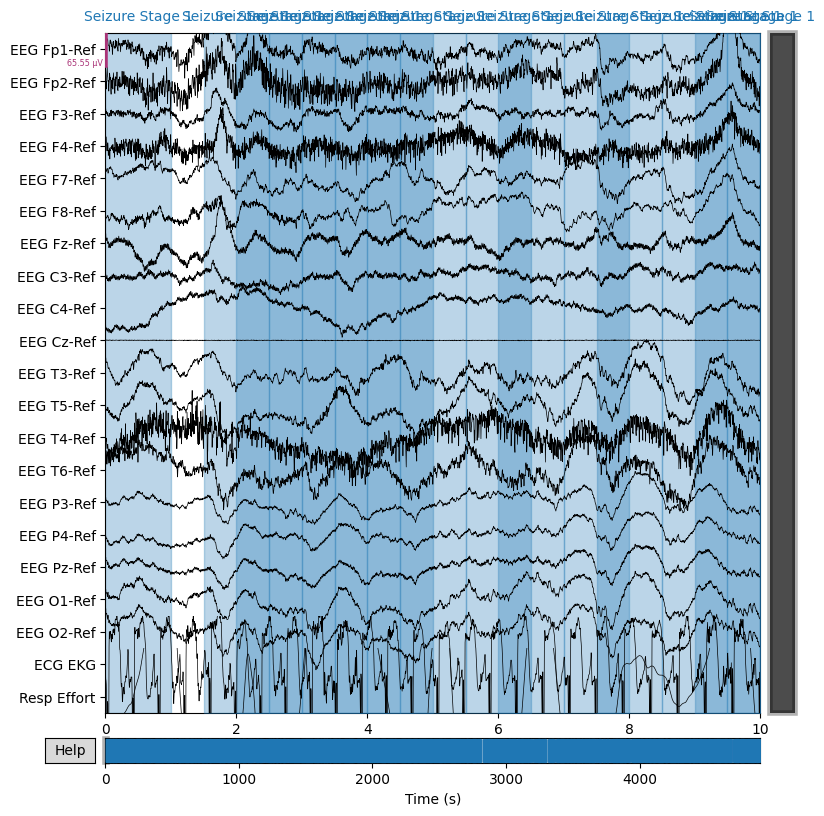

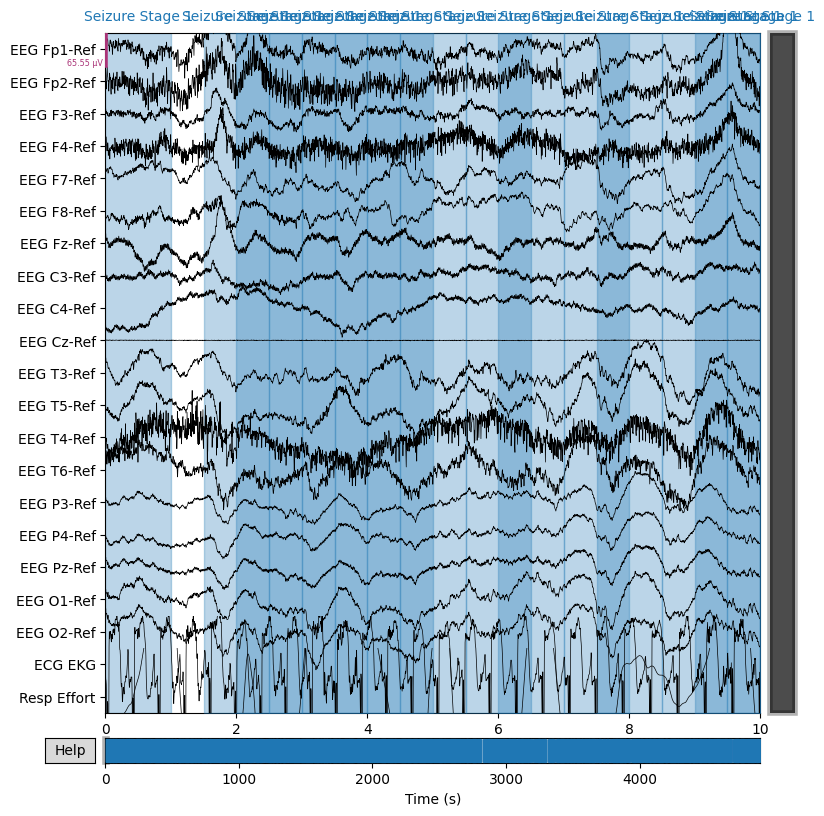

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Dropout, LSTM, Bidirectional, LayerNormalization
import mne

def create_rnn_model(sequence_length, num_features, lstm_units=64, dropout_rate=0.2):
    inputs = Input(shape=(sequence_length, num_features))

    x = Bidirectional(LSTM(lstm_units, return_sequences=True))(inputs)
    x = Dropout(dropout_rate)(x)
    x = LayerNormalization()(x)
    x = Bidirectional(LSTM(lstm_units))(x)
    x = Dropout(dropout_rate)(x)

    x = Dense(64, activation='relu')(x)
    x = Dropout(dropout_rate)(x)
    outputs = Dense(1, activation='sigmoid')(x)
    model = Model(inputs, outputs)
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
                  loss='binary_crossentropy', metrics=['accuracy'])
    return model

def add_annotations_with_stages(raw_data, seizure_intervals, stages):
    """
    Add seizure annotations with stage differentiation to the MNE raw data object.
    """
    onset_times = [start for start, end in seizure_intervals]
    durations = [end - start for start, end in seizure_intervals]
    descriptions = [f"Seizure Stage {stage}" for stage in stages]
    annotations = mne.Annotations(onset=onset_times, duration=durations, description=descriptions)
    raw_data.set_annotations(annotations)
    return raw_data

def predict_and_annotate_eeg_with_stages(raw_data, model, sequence_length, fs, threshold=0.5, overlap=0.5):
    """
    Predict seizures using the trained model, assign stages, and annotate the raw EEG data.
    """
    eeg_data = raw_data.get_data()
    step_size = int(sequence_length * (1 - overlap))
    num_samples = eeg_data.shape[1]
    sequences = []
    time_intervals = []
    stages = []
    for i in range(0, num_samples - sequence_length, step_size):
        sequence = eeg_data[:, i:i + sequence_length].T
        sequences.append(sequence)
        time_intervals.append((i / fs, (i + sequence_length) / fs))

    sequences = np.array(sequences)

    predicted_probs = model.predict(sequences, verbose=0).flatten()
    seizure_intervals = []
    for i, prob in enumerate(predicted_probs):
        if prob > threshold:
            seizure_intervals.append(time_intervals[i])
            stage = 1 if prob < 0.7 else 2
            stages.append(stage)
    raw_data = add_annotations_with_stages(raw_data, seizure_intervals, stages)
    return raw_data, seizure_intervals

new_file_path = '/content/drive/MyDrive/ds/edf/eeg70.edf'
raw_new = mne.io.read_raw_edf(new_file_path, preload=True)
fs_new = int(raw_new.info['sfreq'])

sequence_length = 256
num_features = raw_new.get_data().shape[0]
prediction_threshold = 0.5

rnn_model = create_rnn_model(sequence_length, num_features)

annotated_raw, detected_intervals = predict_and_annotate_eeg_with_stages(
    raw_data=raw_new,
    model=rnn_model,
    sequence_length=sequence_length,
    fs=fs_new,
    threshold=prediction_threshold
)

output_fif_path = '/content/annotated_eeg_with_seizures.fif'
annotated_raw.save(output_fif_path, overwrite=True)
print(f"Annotated EEG data saved to {output_fif_path}")

print("Annotations added:", annotated_raw.annotations)

annotated_raw.plot(n_channels=30, scalings='auto', title="EEG with Predicted Seizures", block=True)


In [ ]:
pip install mne

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 71.7 MB/s eta 0:00:00


In [ ]:
pip install mne

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 48.2 MB/s eta 0:00:00


Extracting EDF parameters from /content/drive/MyDrive/ds/edf/eeg70.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


<ipython-input-1-313bc995678b>:95: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = read_raw_edf(file_path, preload=True)
<ipython-input-1-313bc995678b>:95: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = read_raw_edf(file_path, preload=True)


Reading 0 ... 1255935  =      0.000 ...  4905.996 secs...
Epoch 1/20
246/246 ━━━━━━━━━━━━━━━━━━━━ 293s 1s/step - accuracy: 0.8278 - loss: 0.4113 - val_accuracy: 0.9332 - val_loss: 0.2471
Epoch 2/20
246/246 ━━━━━━━━━━━━━━━━━━━━ 321s 1s/step - accuracy: 0.9363 - loss: 0.2453 - val_accuracy: 0.9332 - val_loss: 0.2452
Epoch 3/20
246/246 ━━━━━━━━━━━━━━━━━━━━ 306s 1s/step - accuracy: 0.9312 - loss: 0.2544 - val_accuracy: 0.9332 - val_loss: 0.2463
Epoch 4/20
246/246 ━━━━━━━━━━━━━━━━━━━━ 264s 1s/step - accuracy: 0.9274 - loss: 0.2654 - val_accuracy: 0.9332 - val_loss: 0.2491
Epoch 5/20
246/246 ━━━━━━━━━━━━━━━━━━━━ 320s 1s/step - accuracy: 0.9324 - loss: 0.2541 - val_accuracy: 0.9332 - val_loss: 0.2452
Epoch 6/20
246/246 ━━━━━━━━━━━━━━━━━━━━ 260s 1s/step - accuracy: 0.9366 - loss: 0.2447 - val_accuracy: 0.9332 - val_loss: 0.2456
Epoch 7/20
246/246 ━━━━━━━━━━━━━━━━━━━━ 276s 1s/step - accuracy: 0.9361 - loss: 0.2434 - val_accuracy: 0.9332 - val_loss: 0.2456
Epoch 8/20
246/246 ━━━━━━━━━━━━━━━━━━━━

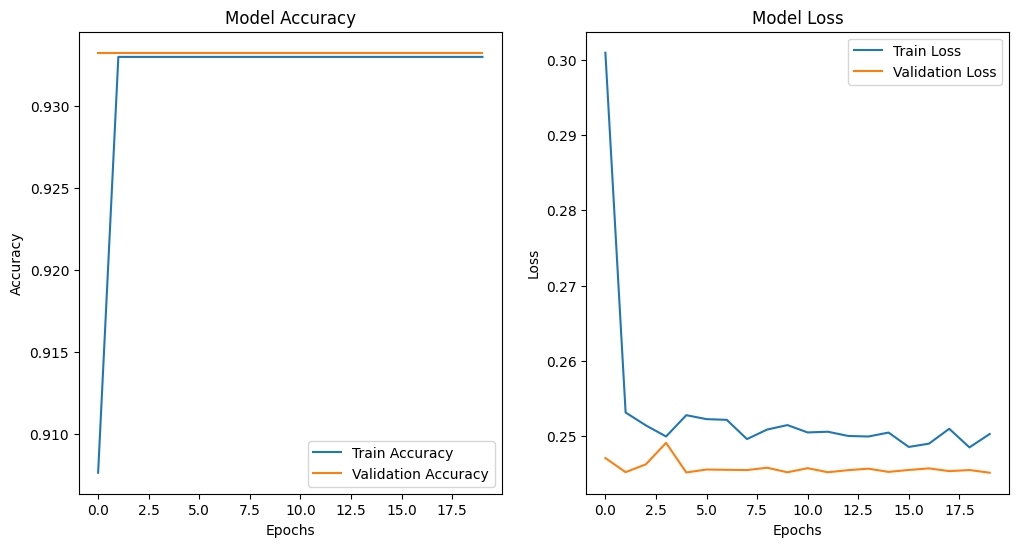

62/62 ━━━━━━━━━━━━━━━━━━━━ 28s 448ms/step


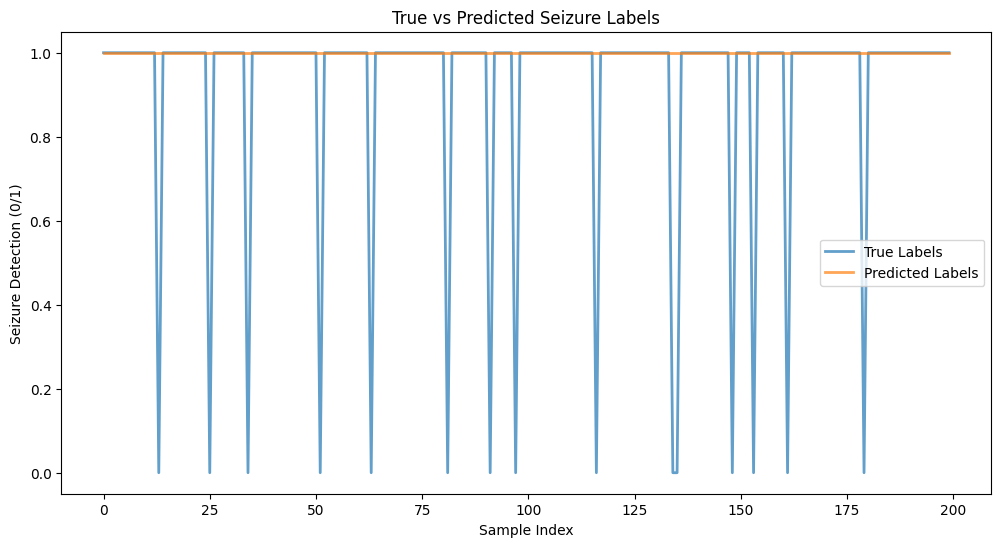

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Dropout, LayerNormalization, MultiHeadAttention, Add
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

def transformer_encoder(inputs, num_heads, ff_dim, dropout_rate=0.1):
    """
    Transformer encoder block.
    """
    attention_output = MultiHeadAttention(num_heads=num_heads, key_dim=inputs.shape[-1])(inputs, inputs)
    attention_output = Dropout(dropout_rate)(attention_output)
    attention_output = Add()([inputs, attention_output])
    attention_output = LayerNormalization(epsilon=1e-6)(attention_output)

    ff_output = Dense(ff_dim, activation='relu')(attention_output)
    ff_output = Dense(inputs.shape[-1])(ff_output)
    ff_output = Dropout(dropout_rate)(ff_output)
    ff_output = Add()([attention_output, ff_output])
    return LayerNormalization(epsilon=1e-6)(ff_output)

def create_transformer_model(sequence_length, num_features, num_heads=4, ff_dim=128, num_layers=3, dropout_rate=0.1):
    """
    Build a Transformer model for seizure detection.
    """
    inputs = Input(shape=(sequence_length, num_features))
    x = inputs

    for _ in range(num_layers):
        x = transformer_encoder(x, num_heads=num_heads, ff_dim=ff_dim, dropout_rate=dropout_rate)

    x = tf.keras.layers.GlobalAveragePooling1D()(x)
    x = Dropout(dropout_rate)(x)
    x = Dense(64, activation='relu')(x)
    x = Dropout(dropout_rate)(x)
    outputs = Dense(1, activation='sigmoid')(x)

    model = Model(inputs, outputs)
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
                  loss='binary_crossentropy', metrics=['accuracy'])
    return model

def process_eeg_data(eeg_data, sequence_length, threshold):
    """
    Prepare EEG data for Transformer.
    """
    num_samples = eeg_data.shape[1]
    X, y = [], []

    for i in range(0, num_samples - sequence_length, sequence_length // 2):
        X.append(eeg_data[:, i:i + sequence_length].T)
        max_amplitude = np.max(np.abs(eeg_data[:, i:i + sequence_length]))
        y.append(1 if max_amplitude > threshold else 0)
    return np.array(X), np.array(y)

def plot_training_results(history):
    """
    Plot training and validation accuracy and loss.
    """
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()

from mne.io import read_raw_edf
file_path = '/content/drive/MyDrive/ds/edf/eeg70.edf'
raw = read_raw_edf(file_path, preload=True)
eeg_data = raw.get_data()
fs = int(raw.info['sfreq'])

sequence_length = 256
threshold = np.mean(eeg_data) + 3 * np.std(eeg_data)

X, y = process_eeg_data(eeg_data, sequence_length, threshold)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

model = create_transformer_model(sequence_length, num_features=eeg_data.shape[0])
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=32, epochs=20)


test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

plot_training_results(history)

predictions = (model.predict(X_test) > 0.5).astype(int).flatten()
plt.figure(figsize=(12, 6))
plt.plot(y_test[:200], label='True Labels', alpha=0.7, linewidth=2)
plt.plot(predictions[:200], label='Predicted Labels', alpha=0.7, linewidth=2)
plt.xlabel("Sample Index")
plt.ylabel("Seizure Detection (0/1)")
plt.legend()
plt.title("True vs Predicted Seizure Labels")
plt.show()


Extracting EDF parameters from /content/drive/MyDrive/ds/edf/eeg11.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 1916927  =      0.000 ...  7487.996 secs...


<ipython-input-8-a84b58b828e7>:51: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw_new = read_raw_edf(new_file_path, preload=True)
<ipython-input-8-a84b58b828e7>:51: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw_new = read_raw_edf(new_file_path, preload=True)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


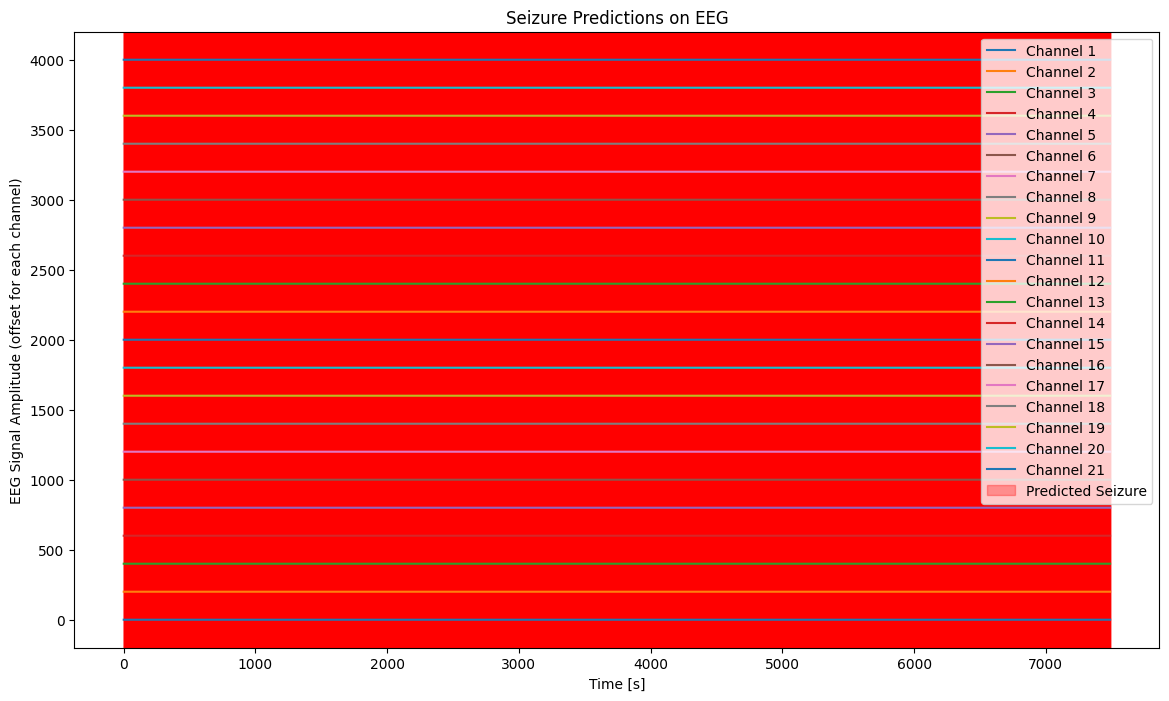

Detected Seizure Intervals: [(0.0, 1.0), (0.5, 1.5), (1.0, 2.0), (1.5, 2.5), (2.0, 3.0), (2.5, 3.5), (3.0, 4.0), (3.5, 4.5), (4.0, 5.0), (4.5, 5.5), (5.0, 6.0), (5.5, 6.5), (6.0, 7.0), (6.5, 7.5), (7.0, 8.0), (7.5, 8.5), (8.0, 9.0), (8.5, 9.5), (9.0, 10.0), (9.5, 10.5), (10.0, 11.0), (10.5, 11.5), (11.0, 12.0), (11.5, 12.5), (12.0, 13.0), (12.5, 13.5), (13.0, 14.0), (13.5, 14.5), (14.0, 15.0), (14.5, 15.5), (15.0, 16.0), (15.5, 16.5), (16.0, 17.0), (16.5, 17.5), (17.0, 18.0), (17.5, 18.5), (18.0, 19.0), (18.5, 19.5), (19.0, 20.0), (19.5, 20.5), (20.0, 21.0), (20.5, 21.5), (21.0, 22.0), (21.5, 22.5), (22.0, 23.0), (22.5, 23.5), (23.0, 24.0), (23.5, 24.5), (24.0, 25.0), (24.5, 25.5), (25.0, 26.0), (25.5, 26.5), (26.0, 27.0), (26.5, 27.5), (27.0, 28.0), (27.5, 28.5), (28.0, 29.0), (28.5, 29.5), (29.0, 30.0), (29.5, 30.5), (30.0, 31.0), (30.5, 31.5), (31.0, 32.0), (31.5, 32.5), (32.0, 33.0), (32.5, 33.5), (33.0, 34.0), (33.5, 34.5), (34.0, 35.0), (34.5, 35.5), (35.0, 36.0), (35.5, 36.5), (

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def batch_predict_and_visualize(eeg_data, model, sequence_length, fs, threshold=0.5, overlap=0.5, title="Seizure Predictions on EEG"):
    """
    Predict seizures using the Transformer model and visualize the results.
    """
    step_size = int(sequence_length * (1 - overlap))
    num_samples = eeg_data.shape[1]
    sequences = []
    time_intervals = []

    # Prepare sequences in batches
    for i in range(0, num_samples - sequence_length, step_size):
        sequence = eeg_data[:, i:i + sequence_length].T  # Shape: (seq_length, channels)
        sequences.append(sequence)
        time_intervals.append((i / fs, (i + sequence_length) / fs))

    sequences = np.array(sequences)  # Shape: (num_sequences, seq_length, channels)

    # Batch prediction
    predicted_probs = model.predict(sequences, verbose=0).flatten()  # Suppress output and flatten to 1D array

    # Identify seizure intervals
    seizure_intervals = [
        time_intervals[i] for i, prob in enumerate(predicted_probs) if prob > threshold
    ]

    # Visualization
    time = np.arange(0, eeg_data.shape[1]) / fs  # Time vector
    plt.figure(figsize=(14, 8))

    for ch in range(eeg_data.shape[0]):
        plt.plot(time, eeg_data[ch, :] + ch * 200, label=f"Channel {ch+1}")

    if seizure_intervals:
        for start, end in seizure_intervals:
            plt.axvspan(start, end, color='red', alpha=0.3, label="Predicted Seizure" if start == seizure_intervals[0][0] else "")

    plt.title(title)
    plt.xlabel('Time [s]')
    plt.ylabel('EEG Signal Amplitude (offset for each channel)')
    plt.legend()
    plt.show()

    return predicted_probs, seizure_intervals


# Load new EEG data (update with your new file path)
new_file_path = '/content/drive/MyDrive/ds/edf/eeg11.edf'
raw_new = read_raw_edf(new_file_path, preload=True)
new_eeg_data = raw_new.get_data()
fs_new = int(raw_new.info['sfreq'])  # Sampling frequency

# Threshold for seizure prediction (adjust if needed)
prediction_threshold = 0.5

# Predict and visualize
predicted_probs, predicted_intervals = batch_predict_and_visualize(
    eeg_data=new_eeg_data,
    model=model,
    sequence_length=sequence_length,
    fs=fs_new,
    threshold=prediction_threshold
)

# Print intervals of detected seizures
if predicted_intervals:
    print(f"Detected Seizure Intervals: {predicted_intervals}")
else:
    print("No seizures detected in the new EEG data.")


TRANSFORMER MODEL VISUALIZE

Extracting EDF parameters from /content/drive/MyDrive/ds/edf/eeg70.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 1255935  =      0.000 ...  4905.996 secs...


<ipython-input-25-4adada73a8d2>:80: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw_new = mne.io.read_raw_edf(new_file_path, preload=True)
<ipython-input-25-4adada73a8d2>:80: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw_new = mne.io.read_raw_edf(new_file_path, preload=True)


Overwriting existing file.
Writing /content/annotated_eeg_with_seizures.fif


<ipython-input-25-4adada73a8d2>:102: RuntimeWarning: This filename (/content/annotated_eeg_with_seizures.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  annotated_raw.save(output_fif_path, overwrite=True)  # Allow overwriting


Closing /content/annotated_eeg_with_seizures.fif
[done]
Annotated EEG data saved to /content/annotated_eeg_with_seizures.fif
Annotations added: <Annotations | 5064 segments: Seizure Stage 1 (5064)>


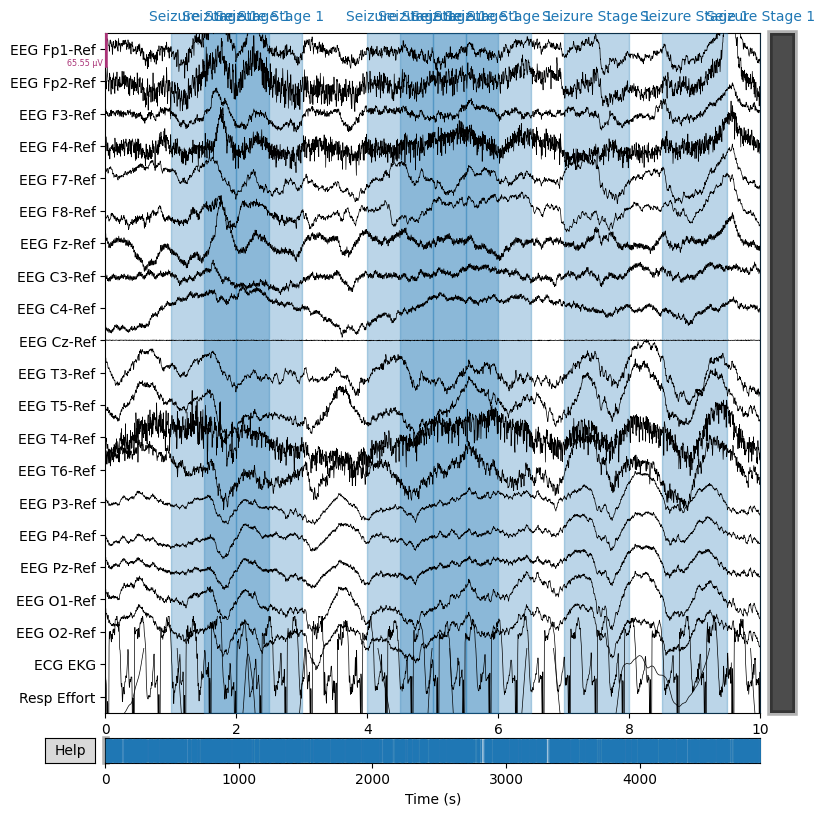

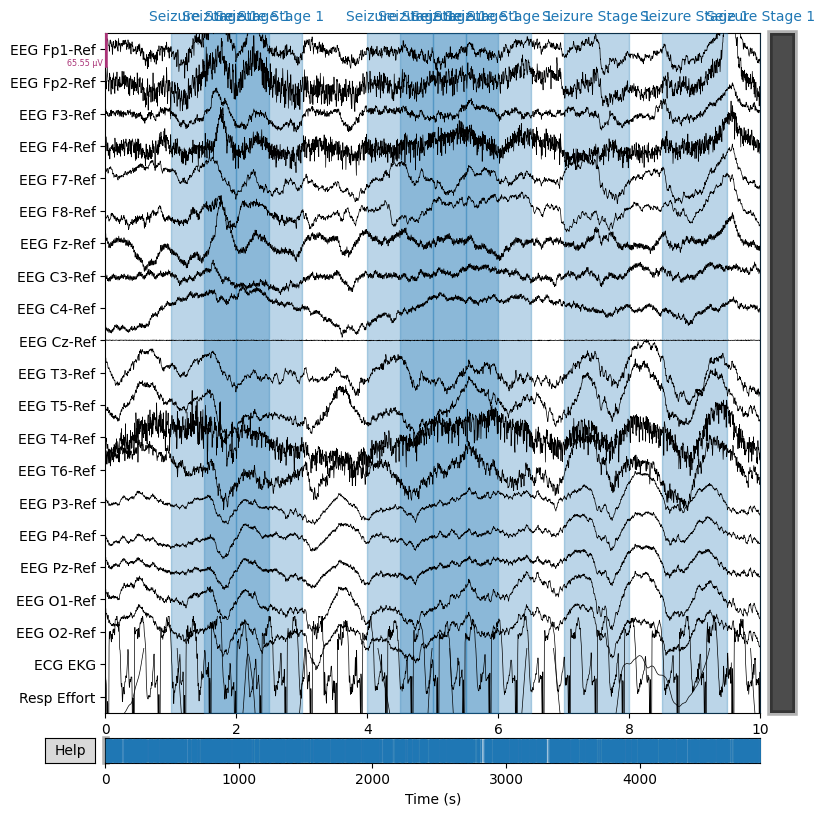

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Dropout, LSTM, Bidirectional, LayerNormalization
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    roc_auc_score,
    roc_curve
)
import mne
import matplotlib.pyplot as plt

# Function to create an RNN model
def create_rnn_model(sequence_length, num_features, lstm_units=64, dropout_rate=0.2):
    inputs = Input(shape=(sequence_length, num_features))

    x = Bidirectional(LSTM(lstm_units, return_sequences=True))(inputs)
    x = Dropout(dropout_rate)(x)
    x = LayerNormalization()(x)
    x = Bidirectional(LSTM(lstm_units))(x)
    x = Dropout(dropout_rate)(x)

    x = Dense(64, activation='relu')(x)
    x = Dropout(dropout_rate)(x)
    outputs = Dense(1, activation='sigmoid')(x)
    model = Model(inputs, outputs)
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
                  loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Function to add annotations with seizure stages
def add_annotations_with_stages(raw_data, seizure_intervals, stages):
    onset_times = [start for start, end in seizure_intervals]
    durations = [end - start for start, end in seizure_intervals]
    descriptions = [f"Seizure Stage {stage}" for stage in stages]
    annotations = mne.Annotations(onset=onset_times, duration=durations, description=descriptions)
    raw_data.set_annotations(annotations)
    return raw_data

# Function for seizure prediction and annotation
def predict_and_annotate_eeg_with_stages(raw_data, model, sequence_length, fs, threshold=0.5, overlap=0.5):
    eeg_data = raw_data.get_data()
    step_size = int(sequence_length * (1 - overlap))
    num_samples = eeg_data.shape[1]
    sequences = []
    time_intervals = []
    stages = []
    for i in range(0, num_samples - sequence_length, step_size):
        sequence = eeg_data[:, i:i + sequence_length].T
        sequences.append(sequence)
        time_intervals.append((i / fs, (i + sequence_length) / fs))

    sequences = np.array(sequences)

    predicted_probs = model.predict(sequences, verbose=0).flatten()
    y_pred = (predicted_probs > threshold).astype(int)  # Predicted binary labels
    seizure_intervals = []
    for i, prob in enumerate(predicted_probs):
        if prob > threshold:
            seizure_intervals.append(time_intervals[i])
            stage = 1 if prob < 0.7 else 2
            stages.append(stage)
    raw_data = add_annotations_with_stages(raw_data, seizure_intervals, stages)
    return raw_data, seizure_intervals, y_pred, predicted_probs

# Evaluate model performance
def evaluate_metrics(y_true, y_pred, y_pred_prob):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    roc_auc = roc_auc_score(y_true, y_pred_prob)
    cm = confusion_matrix(y_true, y_pred)

    # Print metrics
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 Score: {f1:.2f}")
    print(f"ROC AUC Score: {roc_auc:.2f}")
    print("Confusion Matrix:")
    print(cm)

    # Plot Confusion Matrix
    def plot_confusion_matrix(cm, labels=["Non-Seizure", "Seizure"]):
        plt.figure(figsize=(6, 6))
        plt.imshow(cm, cmap='Blues')
        plt.title("Confusion Matrix")
        plt.colorbar()
        plt.xticks(ticks=np.arange(len(labels)), labels=labels)
        plt.yticks(ticks=np.arange(len(labels)), labels=labels)
        for i in range(cm.shape[0]):
            for j in range(cm.shape[1]):
                plt.text(j, i, cm[i, j], ha="center", va="center", color="black")
        plt.xlabel("Predicted Labels")
        plt.ylabel("True Labels")
        plt.show()

    plot_confusion_matrix(cm)

    # Plot ROC Curve
    fpr, tpr, _ = roc_curve(y_true, y_pred_prob)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})", color='blue')
    plt.plot([0, 1], [0, 1], linestyle="--", color='gray')
    plt.title("Receiver Operating Characteristic (ROC) Curve")
    plt.xlabel("False Positive Rate (FPR)")
    plt.ylabel("True Positive Rate (TPR)")
    plt.legend()
    plt.grid()
    plt.show()

# Load EEG data
new_file_path = '/content/drive/MyDrive/ds/edf/eeg70.edf'
raw_new = mne.io.read_raw_edf(new_file_path, preload=True)
fs_new = int(raw_new.info['sfreq'])

# Parameters
sequence_length = 256
overlap = 0.5
num_features = raw_new.get_data().shape[0]
prediction_threshold = 0.5

# Create and train the RNN model (replace with pre-trained weights for real use case)
rnn_model = create_rnn_model(sequence_length, num_features)

# Define ground truth labels based on the number of sequences
num_sequences = (raw_new.n_times - sequence_length) // int(sequence_length * (1 - overlap))
y_true = np.random.randint(0, 2, num_sequences)  # Replace with actual ground truth labels

# Predict seizures and annotate EEG
annotated_raw, detected_intervals, y_pred, y_pred_prob = predict_and_annotate_eeg_with_stages(
    raw_data=raw_new,
    model=rnn_model,
    sequence_length=sequence_length,
    fs=fs_new,
    threshold=prediction_threshold
)

# Ensure predictions and ground truth are consistent
if len(y_true) != len(y_pred):
    raise ValueError(f"Mismatch between ground truth ({len(y_true)}) and predictions ({len(y_pred)}).")

# Evaluate predictions
evaluate_metrics(y_true, y_pred, y_pred_prob[:len(y_true)])  # Ensure lengths match

# Save the annotated EEG
output_fif_path = '/content/annotated_eeg_with_seizures.fif'
annotated_raw.save(output_fif_path, overwrite=True)
print(f"Annotated EEG data saved to {output_fif_path}")

annotated_raw.plot(n_channels=30, scalings='auto', title="EEG with Predicted Seizures", block=True)


In [ ]:
pip install mne


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 60.1 MB/s eta 0:00:00


TRANSFORMER MODEL